In [2]:
import random
from tensorflow.python.keras.layers import Dense, Flatten, MaxPooling2D
from tensorflow.python.keras import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.utils import to_categorical  
from tensorflow.keras.callbacks import ModelCheckpoint

import numpy as np

from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

import h5py

import matplotlib.image as img
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
hf = h5py.File('data/trainingsetv1d0.h5', 'r')

In [4]:
#Create List to Store All Glitches
glitch_set=[]
for glitch in hf.keys():
  glitch_set.append(glitch)

In [5]:
img_size='0.5.png'
input_shape=(140, 170, 1)
batch_size =30

In [6]:
def preprocessX (data, glitch_set, img_size):

  image_count=0

  for glitch in glitch_set:
    length = len(hf[glitch][data].keys())
    image_count=image_count+length

  X=np.zeros((image_count, 140, 170))
  Y=[]
  i = 0 

  for glitch in glitch_set:
    for image in hf[glitch][data].keys():
      img = hf[glitch][data][image][img_size][0][:] 
    # resized = cv2.resize(img, (114, 94), interpolation = cv2.INTER_AREA)
      X[:][:][i] = img
      Y.append(glitch)
      i = i+1 

  #Reshape for Input to CNN
  X=X.reshape((image_count, 140, 170, 1))

  return X, Y

In [7]:
#Integer Encodes Labels
def preprocessY (lst):
    integer_encoded = label_encoder.fit_transform(np.array(lst))
    trainY=to_categorical(integer_encoded)
    return trainY


In [32]:
#Define Model
def create_model():

    model=Sequential()
    model.add(Conv2D(128, kernel_size=(5, 5), activation='relu', input_shape=input_shape))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(128, kernel_size=(5, 5), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Flatten())

    model.add(Dense(256, activation='relu'))
    model.add(Dense(22, activation='softmax'))

    model.compile(loss=CategoricalCrossentropy(),
              optimizer=Adam(),
              metrics=['accuracy'])
    return model
    

In [35]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 136, 166, 128)     3328      
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 68, 83, 128)       0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 64, 79, 128)       409728    
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 32, 39, 128)       0         
_________________________________________________________________
flatten_8 (Flatten)          (None, 159744)            0         
_________________________________________________________________
dense_16 (Dense)             (None, 256)               40894720  
_________________________________________________________________
dense_17 (Dense)             (None, 22)               

In [30]:
testY.shape

(1287, 22)

In [9]:
testX, testY=preprocessX('test', glitch_set, img_size)
testY=preprocessY(testY)

In [53]:
testY[90:100]

array([[0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,

In [56]:
prediction[0:10]

array([[0.04559722, 0.04482583, 0.0462135 , 0.04524267, 0.04470726,
        0.04488653, 0.04590812, 0.04476973, 0.04595957, 0.04497143,
        0.04478022, 0.04543953, 0.04610728, 0.04641405, 0.04500003,
        0.04553853, 0.04659478, 0.0461486 , 0.04543558, 0.04519904,
        0.04557422, 0.04468635],
       [0.04567074, 0.04483335, 0.04630414, 0.04499939, 0.04476798,
        0.04483248, 0.04612364, 0.04478413, 0.04591729, 0.04482643,
        0.04477899, 0.04547848, 0.04611859, 0.04628649, 0.04503223,
        0.04532023, 0.04649402, 0.04630447, 0.04566316, 0.04512687,
        0.0456209 , 0.04471594],
       [0.04571056, 0.04457024, 0.04658173, 0.04529754, 0.04451431,
        0.04476453, 0.04584787, 0.04473948, 0.04599565, 0.04463092,
        0.04447372, 0.04513171, 0.04638939, 0.04653428, 0.04487047,
        0.04564184, 0.04707434, 0.04605569, 0.04533109, 0.04552222,
        0.04576555, 0.04455685],
       [0.04556774, 0.04478253, 0.04626409, 0.04552948, 0.04468992,
        0.0447813

In [22]:
from tensorflow.keras.models import load_model

In [24]:
type(model)

tensorflow.python.keras.engine.sequential.Sequential

In [38]:
# model=create_model()
# new_model = load_model('/home/aditya.vijaykumar/work/nikita/checkpoints/entire/cp-0001.ckpt')
# # Re-evaluate the model
# loss,acc = model.evaluate(testX,  testY, verbose=2)
# print("Restored model, accuracy: {:5.2f}%".format(100*acc))

In [26]:
new_model = load_model('/home/aditya.vijaykumar/work/nikita/checkpoints/entire/model.h5')

In [37]:
loss,acc = new_model.evaluate(testX,  testY, verbose=2)
print("Restored model, accuracy: {:5.2f}%".format(100*acc))

1287/1287 - 12s - loss: 0.3681 - accuracy: 0.9394
Restored model, accuracy: 93.94%


In [58]:
prediction=new_model.predict(testX)

In [59]:
pred_labels = np.argmax(prediction, axis=-1)    
test_labels= np.argmax(testY, axis=-1)  

In [60]:
pred_labels[0:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [49]:
test_labels[0:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [44]:
import pandas as pd

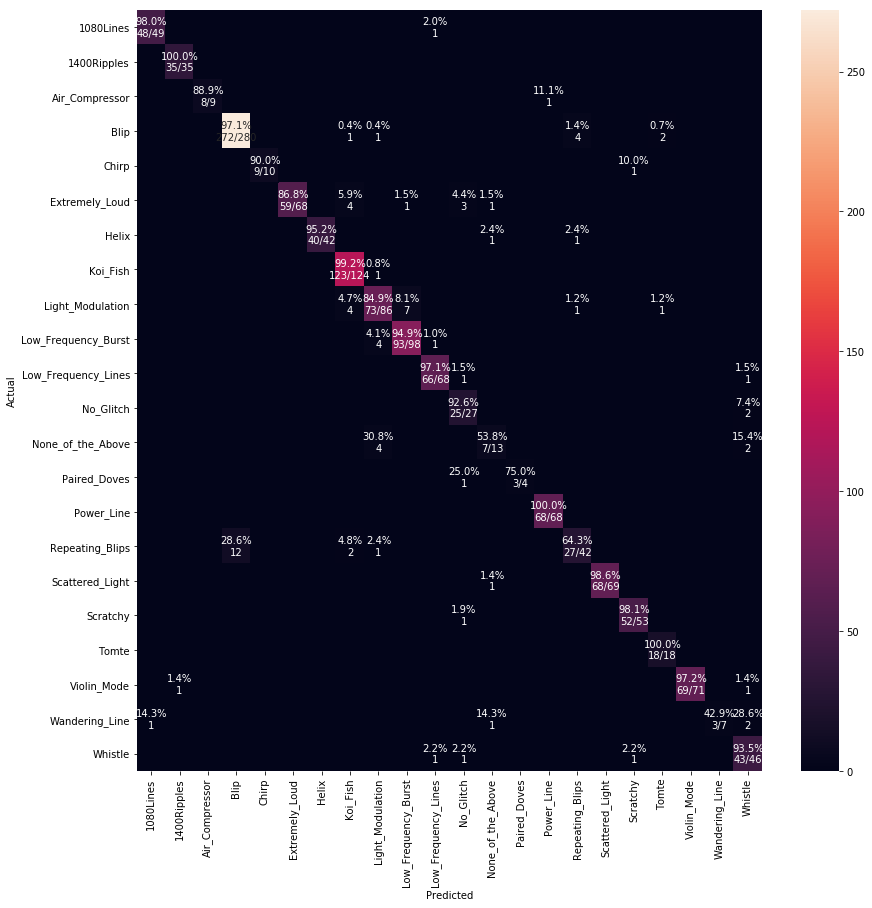

In [63]:
#Confusion Matrix
import seaborn as sns
from sklearn.metrics import confusion_matrix

def plot_cm(y_true, y_pred, label, figsize=(14, 14)):
    cm = confusion_matrix(y_true, y_pred, labels=np.unique(y_true))
    cm_sum = np.sum(cm, axis=1, keepdims=True)
    cm_perc = cm / cm_sum.astype(float) * 100
    annot = np.empty_like(cm).astype(str)
    nrows, ncols = cm.shape
    for i in range(nrows):
        for j in range(ncols):
            c = cm[i, j]
            p = cm_perc[i, j]
            if i == j:
                s = cm_sum[i]
                annot[i, j] = '%.1f%%\n%d/%d' % (p, c, s)
            elif c == 0:
                annot[i, j] = ''
            else:
                annot[i, j] = '%.1f%%\n%d' % (p, c)
    cm = pd.DataFrame(cm, index=label, columns=label)
    cm.index.name = 'Actual'
    cm.columns.name = 'Predicted'
    fig, ax = plt.subplots(figsize=figsize)
    sns.heatmap(cm, annot=annot, fmt='', ax=ax)
    
plot_cm(test_labels, pred_labels, glitch_set)